In [1]:
import json
import os
import networkx as nx

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt

In [4]:
CWD = os.getcwd()
DATA_DIR = os.path.join(CWD, "data")
GROUP_JSON = "pyladies_group.json"
MEMBERS_JSON = "pyladies_members.json"
IGNORE_JSON = [GROUP_JSON, MEMBERS_JSON]

In [5]:
def get_pugs(pyladies_group):
    pyladies_dir = os.path.join(DATA_DIR, pyladies_group)

    # don't load files to ignore
    groups = os.listdir(pyladies_dir)
    for group in IGNORE_JSON:
        try:
            group_index = groups.index(group)
            groups.pop(group_index)
        except ValueError:
            pass
    groups = [g.strip(".json") for g in groups]
    return groups

In [6]:
sf_groups = get_pugs("PyLadiesofSanFrancisco")

In [22]:
G = nx.Graph(location="San Francisco")

In [23]:
G.graph

{'location': 'San Francisco'}

In [9]:
# load group data for a PyLadies Meetup Group
def load_group_data(pyladies_group):
    pyladies_dir = os.path.join(DATA_DIR, pyladies_group)

    # don't load files to ignore
    groups = os.listdir(pyladies_dir)
    for group in IGNORE_JSON:
        try:
            group_index = groups.index(group)
            groups.pop(group_index)
        except ValueError:
            pass
    group_data = []
    for group in groups:
        group_file = os.path.join(pyladies_dir, group)
        with open(group_file, "r") as f:
            data = json.load(f)
        group_name = group.strip(".json")
        tmp = dict(name=group_name, data=data)
        group_data.append(tmp)
    return group_data

In [10]:
group_data = load_group_data("PyLadiesofSanFrancisco")

In [11]:
pyladies = group_data[10]

In [12]:
pyladies_members = [p.get("id") for p in pyladies.get("data")]

In [13]:
len(pyladies_members)

3249

In [14]:
pug = group_data[15]
pug_members = [p.get("id") for p in pug.get("data")]

In [15]:
len(pug_members)

7942

In [16]:
same = list(set(pyladies_members) & set(pug_members))

In [17]:
len(same)

1028

In [18]:
def create_edges(pyladies_group, location):
    members = {}
    for group in location:
        _members = [g.get("id") for g in group.get("data")]
        members[group.get("name")] = _members
    edges = []
    max_edge = 0
    pyladies = members.pop(pyladies_group)
    for group, mem in members.items():
        same = list(set(pyladies) & set(mem))
        max_edge = max(max_edge, len(same))
        edge = (pyladies_group, group, len(same))
        edges.append(edge)
    edges = [(e[0], e[1], {'weight': e[2] / max_edge}) for e in edges]
    return edges
    

In [19]:
edges = create_edges("PyLadiesofSanFrancisc", group_data)

In [24]:
G = nx.Graph(location="San Francisco")
G.add_nodes_from(sf_groups)
G.add_edges_from(edges)

In [37]:
labels = {}
for i in sf_groups:
    labels[i] = i

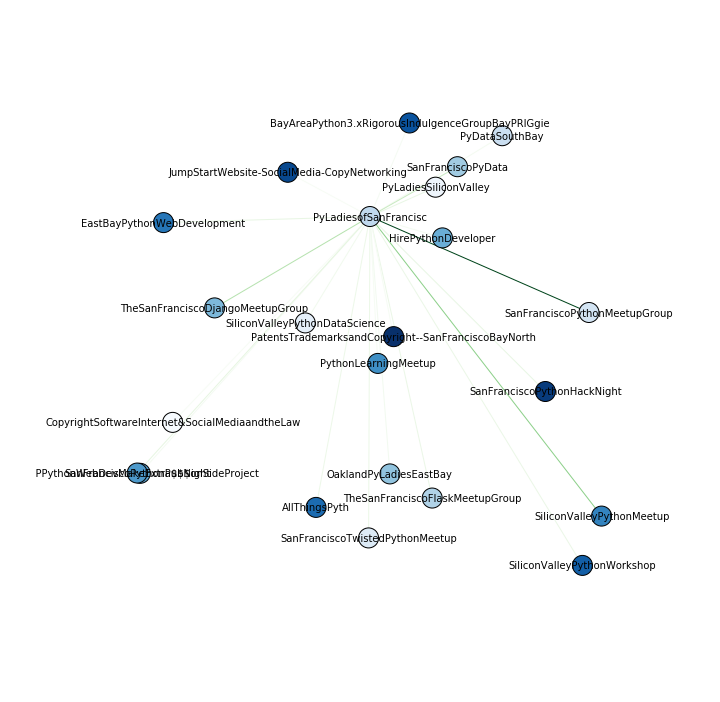

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.axis('off')
edgewidth = [d.get('weight') for (u, v, d) in G.edges(data=True)]
pos = nx.random_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=400, node_color=range(len(sf_groups)),cmap=plt.cm.Blues)
nx.draw_networkx_edges(G,pos,edge_color=edgewidth, edge_cmap=plt.cm.Greens)
nx.draw_networkx_labels(G, pos, labels, font_size=10, label_pos=5);  # semicolon to suppress annoying matplotlib output